## Pràctica 1: Resolem un problema de classificacio

#### Autores: Adrián González (1636620) y Carlos ()

### PLANIFICACIÓN DE LA PRÁCTICA

1. **Importar bibliotecas y cargar datos**
   - Importar las bibliotecas necesarias (pandas, sklearn, etc.).
   - Cargar los datos del Titanic.

2. **Análisis Exploratorio de Datos (EDA)**
   - Inspeccionar los atributos y sus tipos.
   - Evaluar el atributo objetivo y su distribución.
   - Identificar y tratar los valores faltantes.
   - Calcular correlaciones y visualizarlas.

3. **Preprocesamiento de Datos**
   - Normalizar los datos si es necesario.
   - Manejar valores faltantes (eliminar o imputar).
   - Codificar datos categóricos.
   - Realizar PCA si es apropiado.
   - Seleccionar características si es necesario.
   - Aplicar "PolynomialFeatures" si es útil.

4. **Selección de Métricas**
   - Elegir la métrica de evaluación (accuracy, f1-score, average precision).
   - Crear funciones para visualizar las curvas ROC y PR.
   - Utilizar "classification_report" para obtener métricas detalladas.

5. **Selección de Modelos con Validación Cruzada**
   - Definir los modelos a evaluar (por ejemplo, regresión logística, random forest, KNN, SVM).
   - Realizar validación cruzada para seleccionar el mejor modelo.
   - Realizar búsqueda de hiperparámetros para cada modelo.
   - Comparar los resultados en una tabla.
   - Ajustar la configuración de la validación cruzada y "k".
   - Explorar métodos de búsqueda de hiperparámetros.

6. **Análisis Final**
   - Interpretar las curvas ROC/PR y seleccionar la más relevante.
   - Evaluar las métricas detalladas y definir una métrica principal.
   - Considerar mejoras posibles para el modelo.


 ### 1. Importar bibliotecas y cargar datos 📚

In [151]:
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, roc_curve, auc, classification_report
import matplotlib.pyplot as bplt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from tqdm import tqdm
import time

In [152]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train = pd.read_csv('train.csv')
df_train
df_test = pd.read_csv('train.csv')

### 2. Análisis Exploratorio de Datos (EDA) 🔎

**Variables Numéricas:**

    - Calcular estadísticas descriptivas: la media, la mediana, la desviación estándar, el mínimo y el máximo.
    - Visualizar histogramas y boxplots para entender la distribución de los datos.
    - Realizar un análisis de valores atípicos (outliers) para identificar observaciones inusuales.
    - Calcular correlaciones entre las variables numéricas utilizando matrices de correlación y mapas de calor.
    - Crear gráficos de dispersión para explorar relaciones entre pares de variables numéricas.

**Variables Categóricas:**

    - Calcular la frecuencia de cada categoría para comprender la distribución de las variables categóricas.
    - Crear gráficos de barras o gráficos de pastel para visualizar la distribución de categorías.
    - Evaluar la relación entre variables categóricas
    - Realizar análisis de variables categóricas respecto a la variable objetivo.
    - Identificar y manejar categorías raras o poco frecuentes si es necesario.

In [153]:
print("Numero de columnas en el train (atributos): ",df_train.shape[1])
print("---------------------------------------")
print("Numero de filas en el train (muestras): ",df_train.shape[0])

Numero de columnas en el train (atributos):  12
---------------------------------------
Numero de filas en el train (muestras):  891


In [154]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



| Variable    | Tipo        | Descripción                                         |
|------------ |------------ |--------------------------------------------------- |
| passengerId | int64         | Valor de identificación único de cada pasajero     |
| name        | object      | Nombre del pasajero                                |
| sex         | object      | Género (masculino o femenino)                      |
| age         | float64     | Edad de la persona (niños menores de 12 meses representados en fracción de año) |
| pclass       | int64      | Clase del ticket (1 = 1ra, 2 = 2da, 3 = 3ra)                        |
| embarked    | object      | Puerto de embarque de las personas                |
| ticket    | object     | Número de ticket (NA para la tripulación)         |
| fare        | float64     | Precio del ticket (NA para la tripulación, músicos, empleados y otros) |
| sibsp       | int64 | Número de hermanos/familiares                  |
| cabin       | object      | Tipo de cabina ocupada por el pasajero            |
| parch       | int64 | Número de padres e hijos a bordo               |
| survived    | int64 | Sobrevive (0 = No, 1 = Si) al hundimiento      |

- Variables numéricas: Age, Fare, SibSp, Parch 

- Variables categóricas: Survived (Binario), Sex (Binario), Embarked, Pclass (Ternario), Name, PassengerId, Ticket, Cabin

In [155]:
def has_nans(df):
  return df.isna().sum().sum()>0


print ("¿Tenemos Nans?")
print (has_nans(df_train))
if(has_nans(df_train)):
    print ("Si es así, ¿cuantos?")
    print(pd.isnull(df_train).sum())

¿Tenemos Nans?
True
Si es así, ¿cuantos?
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [156]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000,891.000,891.000,891,891,714.000,891.000,891.000,891,891.000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000,0.384,2.309,NaN,NaN,29.699,0.523,0.382,NaN,32.204,NaN,NaN
std,257.354,0.487,0.836,NaN,NaN,14.526,1.103,0.806,NaN,49.693,NaN,NaN
min,1.000,0.000,1.000,NaN,NaN,0.420,0.000,0.000,NaN,0.000,NaN,NaN
25%,223.500,0.000,2.000,NaN,NaN,20.125,0.000,0.000,NaN,7.910,NaN,NaN
50%,446.000,0.000,3.000,NaN,NaN,28.000,0.000,0.000,NaN,14.454,NaN,NaN
75%,668.500,1.000,3.000,NaN,NaN,38.000,1.000,0.000,NaN,31.000,NaN,NaN


Análisis de datos a simple vista:

- El total de pasageros es 891
- Así de primeras PassengerId y Ticket no creemos que vayan a ser muy relevantes al ser identificadores únicos, Fare igual (este último por que pclass es equivalente)

Deberemos tratar algunos NaNs:

- Existen columnas con muchos Nans: Age y Cabin 
- Embarked tiene dos NaNs

Cabin es poco relevante y tiene muchos NaNs

In [157]:
df_train = df_train.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [158]:
df_train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Embarked      3
dtype: int64

In [159]:
# Resumen estadístico de las variables categóricas
df_train.describe(include='O')

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,644


0    549
1    342
Name: Survived, dtype: int64


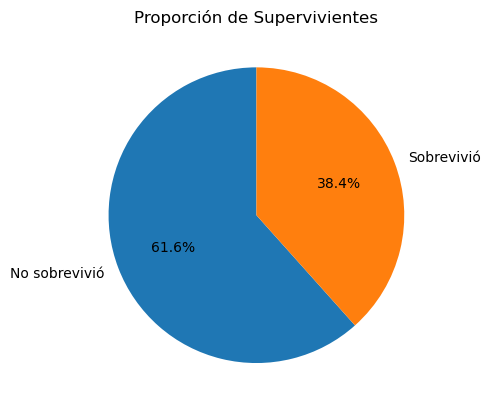

In [160]:
# Contar el número de pasajeros que sobrevivieron y que no sobrevivieron
survival_counts = df_train['Survived'].value_counts()
# Visualizar la proporción de sobrevivientes
print(survival_counts)
bplt.pie(survival_counts, labels=['No sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', startangle=90)
bplt.title('Proporción de Supervivientes')
bplt.show()

Las etiquetas no están balanceadas, de hecho están muy desbalanceadas. En un gráfico se puede ver mejor:

% mujeres supervivientes: 74.20382165605095
% hombres supervivientes: 18.890814558058924
male      577
female    314
Name: Sex, dtype: int64


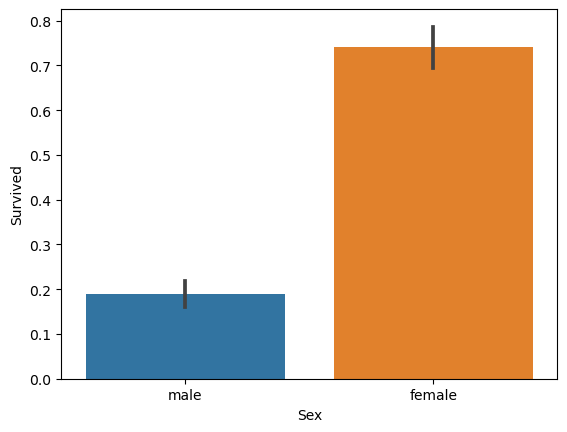

In [161]:
sns.barplot(x="Sex", y="Survived", data=df_train)

print("% mujeres supervivientes:", df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("% hombres supervivientes:", df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

print(df_train['Sex'].value_counts())

Las mujeres son más propensas a sobrevivir.

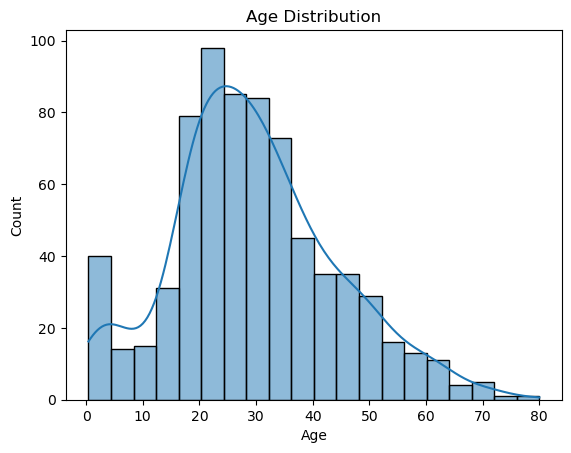

In [162]:
sns.histplot(data=df_train, x='Age', kde=True)
bplt.title('Age Distribution')
bplt.xlabel('Age')
bplt.ylabel('Count')
bplt.show()

Los jóvenes son más propensos a sobrevivir.

In [163]:
fig = px.histogram(df_train, x='Age', color='Survived', title='Survival by Age',
                   marginal='box', barmode='group', color_discrete_sequence=['#ff7f0e', '#3498db'],
                   )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

Sobreviven más personas jóvenes, pero tampoco hay una gran diferencia. De hecho, sobreviven más jóvenes por que en el barco habían más jóvenes.

% de Pclass = 1 supervivientes: 62.96296296296296
% de Pclass = 2 supervivientes: 47.28260869565217
% de Pclass = 3 supervivientes: 24.236252545824847


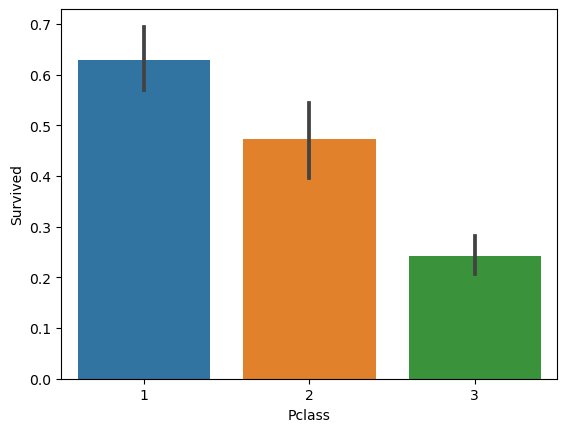

In [164]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

print("% de Pclass = 1 supervivientes:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("% de Pclass = 2 supervivientes:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("% de Pclass = 3 supervivientes:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Pclass: Sobreviven más los de 1º y 2º clase que los de 3º (lógico)

% de Embarked = S supervivientes: 33.69565217391305
% de Embarked = C supervivientes: 55.35714285714286
% de Embarked = Q supervivientes: 38.961038961038966


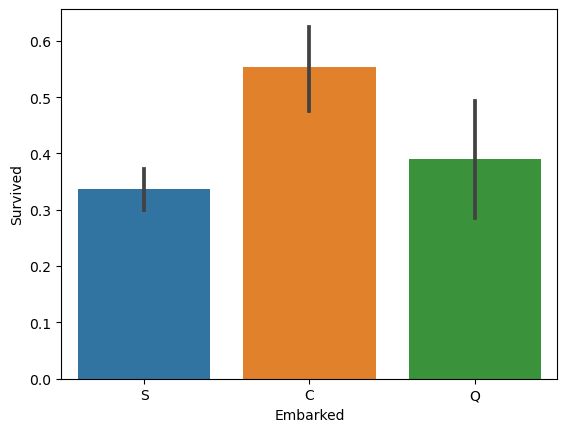

In [165]:
sns.barplot(x="Embarked", y="Survived", data=df_train)

print("% de Embarked = S supervivientes:", df_train["Survived"][df_train["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("% de Embarked = C supervivientes:", df_train["Survived"][df_train["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("% de Embarked = Q supervivientes:", df_train["Survived"][df_train["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

Embarked: Sobreviven más los que embarcaron desde el puerto C.

### 3. Preprocesamiento de Datos ⚒️

Antes de empezar con el preprocesamiento cabe recalcar que hemos decidido no aplicar ningún tipo de normalización MinMax / Standard / RobustScalers puesto que los rangos no son demasiado diferentes (excepto age, pero no creemos que normalizar marque la diferencia) y solo se vería una pequeña diferencia usando SVM que es más sensible a escala. 


Fusionamos SibSp y Parch en FamSize

In [175]:
df_train['FamSize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamSize'] = df_test['SibSp'] + df_test['Parch'] + 1

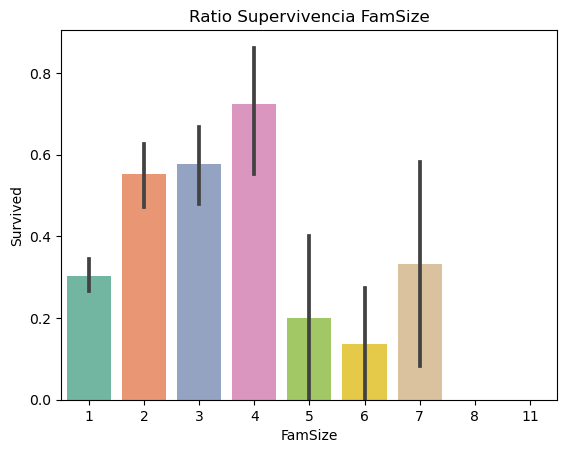

In [176]:
sns.barplot(data=df_train, x='FamSize', y='Survived', palette='Set2')
bplt.title('Ratio Supervivencia FamSize')
bplt.show()

FamSize: Las familias más pequeñas (1 a 4) eran más propensas a sobrevivir

In [177]:
df_train["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [186]:
name = df_train["Name"]
df_train["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
name = df_test["Name"]
df_test["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

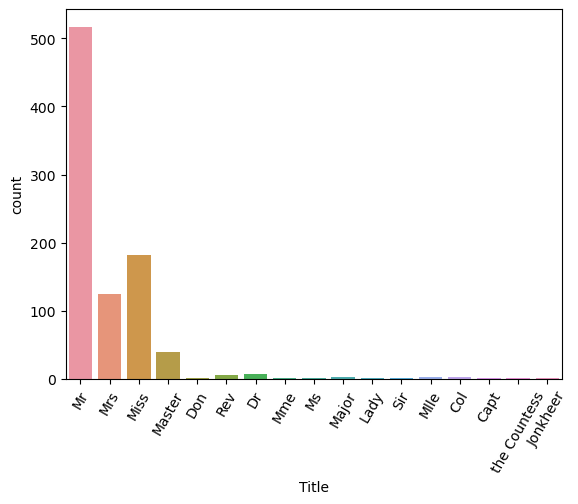

In [187]:
sns.countplot(x="Title", data = df_train)
bplt.xticks(rotation = 60)
bplt.show()

In [191]:
grp = df_train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]

df_train['Age'], df_test['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [df_train, df_test]]

Utilizamos los promedios de edad de df_train para llenar valores faltantes en las columnas de edad de df_train y df_test en función de las características "Pclass" "Sex" y "Title" de cada pasajero. 

In [180]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamSize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,S,1,Mr


In [181]:
df_train["Title"] = df_train["Title"].replace(["Don","Rev","Dr","Mme","Ms","Mlle","Sir","Lady","Dona","Jonkheer","the Countess","Major","Capt","Col"],"otro")
df_test["Title"] = df_test["Title"].replace(["Don","Rev","Dr","Mme","Mlle","Sir","Lady","Dona","jonkheer","the Countess","Major","Capt","Col"],"otro")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamSize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,S,1,Mr


In [182]:
df_train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'otro'], dtype=object)

In [183]:
df_train = pd.get_dummies(df_train, columns=["Title"])
df_test = pd.get_dummies(df_test, columns=["Title"])
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamSize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_otro
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,S,2,0,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,C,2,0,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,S,1,0,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,S,2,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,S,1,0,0,1,0,0


In [192]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_column = imputer.fit_transform(df_train['Embarked'].values.reshape(-1, 1))

imputed_column = imputed_column.flatten()

df_train['Embarked'] = imputed_column

imputed_column_test = imputer.fit_transform(df_train['Embarked'].values.reshape(-1, 1))

imputed_column_test = imputed_column_test.flatten()

df_test['Embarked'] = imputed_column_test

Relleno los NaNs de Embarked basándome en la moda (valor que + se repite).

In [22]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])
encoded = list(df_train.columns)
print("{} columnas despues de hacer one-hot encoding.".format(len(encoded)))
df_train.head()

9 columnas despues de hacer one-hot encoding.


,Survived,Pclass,Age,FamSize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827,-0.535,0.059,0,1,0,0,1
1,1,-1.566,0.668,0.059,1,0,1,0,0
2,1,0.827,-0.234,-0.561,1,0,0,0,1
3,1,-1.566,0.443,0.059,1,0,0,0,1
4,0,0.827,0.443,-0.561,0,1,0,0,1


<AxesSubplot:>

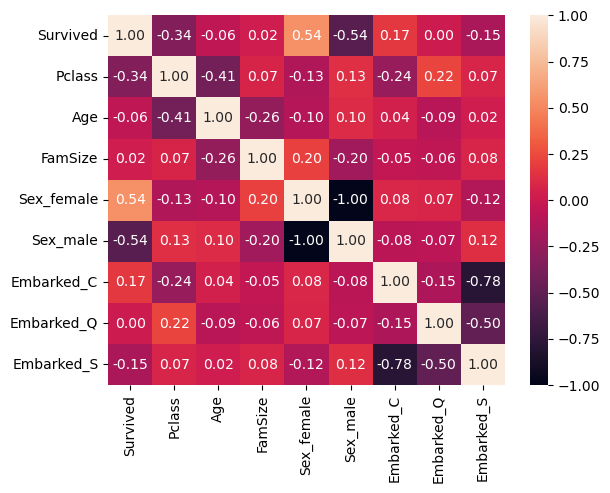

In [24]:
# Calcular la matriz de correlación
sns.heatmap(df_train.corr(),cmap="YlOrRd", edgecolor = "#1c1c1c", linewidth = 3)

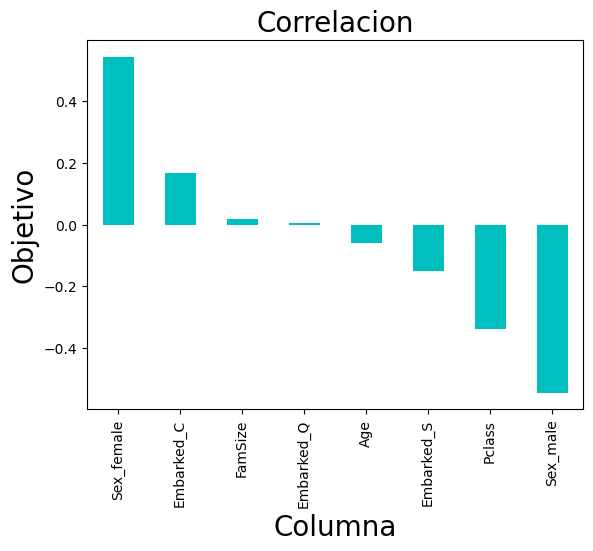

In [25]:
df_train.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'c')

bplt.xlabel('Columna', fontsize = 20)

bplt.ylabel('Objetivo', fontsize = 20)

bplt.title('Correlacion', fontsize = 20)

bplt.show()

## 4. Metric selection

Para nuestro problema escogeremos **f1-score** ya que  tiene en cuenta tanto la precisión como el recall, lo que convierte esta métrica en la + equilibrada para evaluar el rendimiento de nuestro modelo (tanto los verdaderos positivos como los verdaderos negativos son importantes)

Gracias a la curva PR se podrá observar visualmente cómo varían la precisión y el recall.  

In [23]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_train.drop(['Survived'], axis=1)
y_test = df_train['Survived']

In [51]:
def plot_f1_scores(classifiers, X_train, y_train, X_test, y_test, cv=5):
    log_cols = ["Classifier", "F1-Score", "PR AUC", "ROC AUC"]
    log_list = []

    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    pr_recall_curves = {}
    roc_curves = {}

    for clf_name, clf in classifiers:
        f1_scores = []
        pr_auc_scores = []
        roc_auc_scores = []

        for train_index, val_index in stratified_kfold.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            clf.fit(X_train_fold, y_train_fold)
            y_pred = clf.predict(X_val_fold)
            f1 = f1_score(y_val_fold, y_pred)
            f1_scores.append(f1)

            if hasattr(clf, "predict_proba"):
                y_scores = clf.predict_proba(X_val_fold)[:, 1]
            else:
                y_scores = clf.decision_function(X_val_fold)

            precision, recall, _ = precision_recall_curve(y_val_fold, y_scores)
            pr_auc = auc(recall, precision)
            pr_auc_scores.append(pr_auc)

            fpr, tpr, _ = roc_curve(y_val_fold, y_scores)
            roc_auc = auc(fpr, tpr)
            roc_auc_scores.append(roc_auc)

        mean_f1 = np.mean(f1_scores)
        mean_pr_auc = np.mean(pr_auc_scores)
        mean_roc_auc = np.mean(roc_auc_scores)

        log_list.append([clf_name, mean_f1, mean_pr_auc, mean_roc_auc])

        precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
        pr_curve = (recall, precision)
        roc_curve_data = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        pr_recall_curves[clf_name] = pr_curve
        roc_curves[clf_name] = roc_curve_data

    log = pd.DataFrame(log_list, columns=log_cols)
    log = log.sort_values(by="F1-Score", ascending=False)

    fig, axs = bplt.subplots(3, 1, figsize=(10, 12))

    axs[0].barh(log['Classifier'], log['F1-Score'], color='skyblue')
    axs[0].set_xlim(0.7, 0.78)
    axs[0].set_xlabel('F1-Score')
    axs[0].set_title('Clasificador F1-Score')

    for i, clf_name in enumerate(log['Classifier']):
        axs[1].plot(pr_recall_curves[clf_name][0], pr_recall_curves[clf_name][1], label=f'{clf_name} (AUC = {log["PR AUC"].iloc[i]:.2f})')
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_title('Precision-Recall Curve')
        axs[1].legend(loc='best')

        axs[2].plot(roc_curves[clf_name][0], roc_curves[clf_name][1], label=f'{clf_name} (AUC = {log["ROC AUC"].iloc[i]:.2f})')
        axs[2].set_xlabel('False Positive Rate')
        axs[2].set_ylabel('True Positive Rate')
        axs[2].set_title('ROC Curve')
        axs[2].legend(loc='best')

    bplt.tight_layout()
    bplt.show()

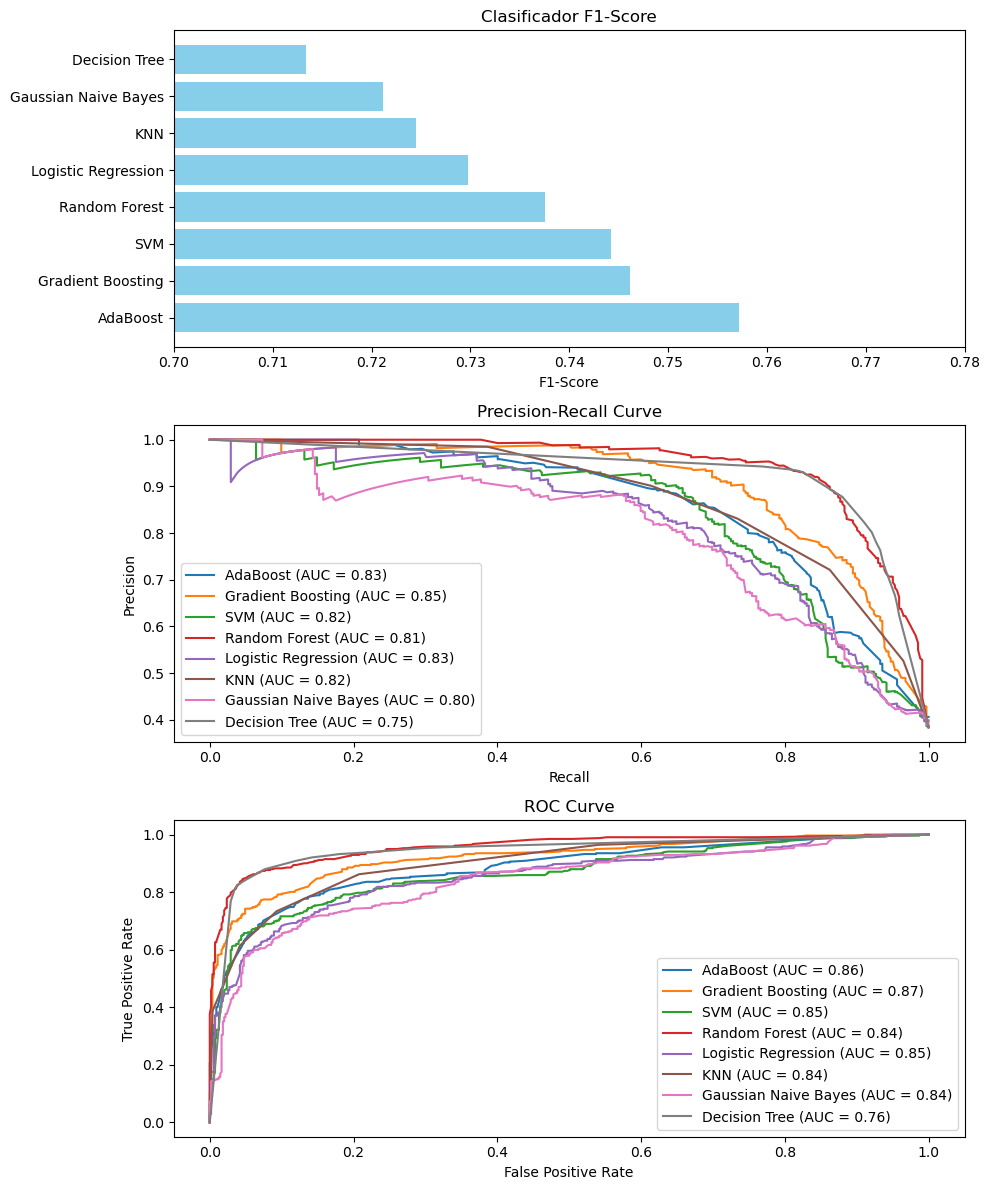

In [52]:
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC(random_state=42, probability=True)),
]

plot_f1_scores(classifiers, X_train, y_train, X_test, y_test)

In [50]:
for clf_name, clf in classifiers:
    print(clf_name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891

KNN
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       549
           1       0.84      0.76      0.80       342

    accuracy                           0.85       891
   macro avg       0.85      0.84      0.84       891
weighted avg       0.85      0.85      0.85       891

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.73      0.73      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      

In [53]:
def grid_search(X_train, y_train, X_test, y_test, model, param_grid, cv=5, hue_feat=None):
    grid = GridSearchCV(model, param_grid, 
                        scoring=make_scorer(f1_score),
                        cv=cv, verbose=3, n_jobs=32)

    grid.fit(X_train, y_train)
    df_tmp = pd.DataFrame(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

    df_summary = pd.DataFrame()
    mn_ts_scores = []
    for i, row in df_tmp.iterrows():
        mn_ts_scores.append(row[1])
        df_tmp = pd.DataFrame(row[0], index=[0])
        df_summary = pd.concat([df_summary, df_tmp])
    df_summary['mean test score'] = mn_ts_scores
    df_summary = df_summary.reset_index(drop=True)
    print(df_summary.head())
    print(df_summary.columns)
    sns.pairplot(data=df_summary, hue=hue_feat)
    bplt.show()

    best_model = grid.best_estimator_
    y_pred_test = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    print(f'F1-Score en el conjunto de prueba: {f1_test}')

    return df_summary.head(10)

Fitting 5 folds for each of 182 candidates, totalling 910 fits
   leaf_size  n_neighbors  weights  mean test score
0         27            3  uniform            0.739
1         29            3  uniform            0.739
2         25            3  uniform            0.739
3         23            3  uniform            0.739
4          7            3  uniform            0.737
Index(['leaf_size', 'n_neighbors', 'weights', 'mean test score'], dtype='object')


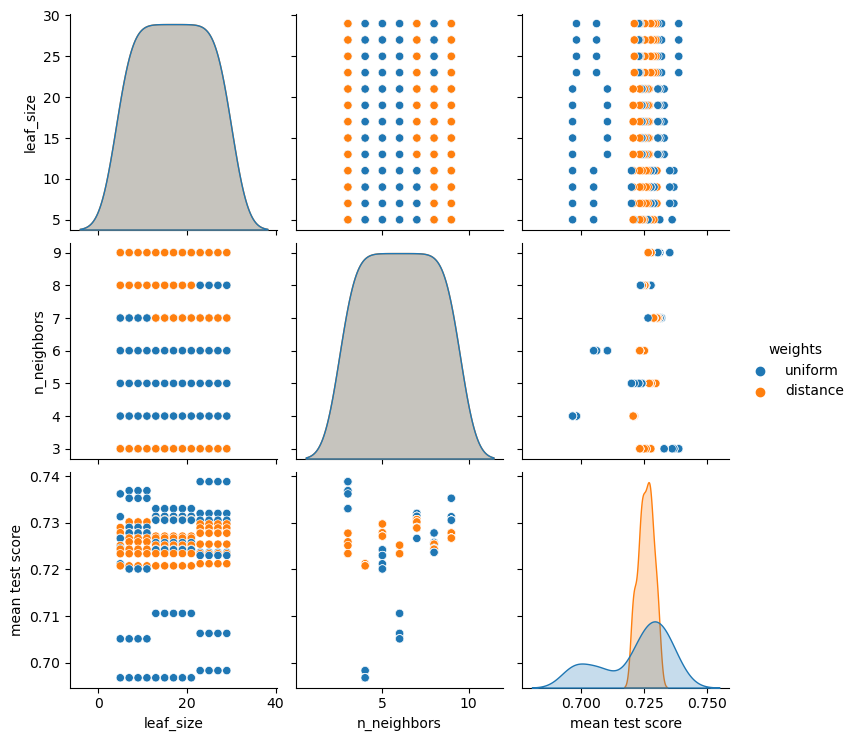

F1-Score en el conjunto de prueba: 0.8265460030165912


,leaf_size,n_neighbors,weights,mean test score
0,27,3,uniform,0.739
1,29,3,uniform,0.739
2,25,3,uniform,0.739
3,23,3,uniform,0.739
4,7,3,uniform,0.737
5,9,3,uniform,0.737
6,11,3,uniform,0.737
7,5,3,uniform,0.736
8,9,9,uniform,0.735
9,11,9,uniform,0.735


In [54]:
knc = KNeighborsClassifier()

param_knc = dict(n_neighbors=np.arange(3,10),weights=['uniform','distance'],# 
                 leaf_size=np.arange(5,30,2))

df_knc = grid_search(X_train, y_train, X_test, y_test, knc, param_knc, hue_feat='weights')
df_knc

Para **n_neighbors = 5** y para diversos valores de **leaf_size** (por ejemplo 5) el resultado de mean test score es el mismo por tanto nos quedaremos con estos valores de dichos hiperparámetros.

Fitting 5 folds for each of 117 candidates, totalling 585 fits


C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


95 fits failed out of a total of 585.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=1.05)

--------------------------------------------------------------------------------
5 fi

   l1_ratio penalty  mean test score
0     0.850      l2            0.729
1     1.250      l2            0.729
2     0.650      l2            0.729
3     0.700      l2            0.729
4     0.750      l2            0.729
Index(['l1_ratio', 'penalty', 'mean test score'], dtype='object')


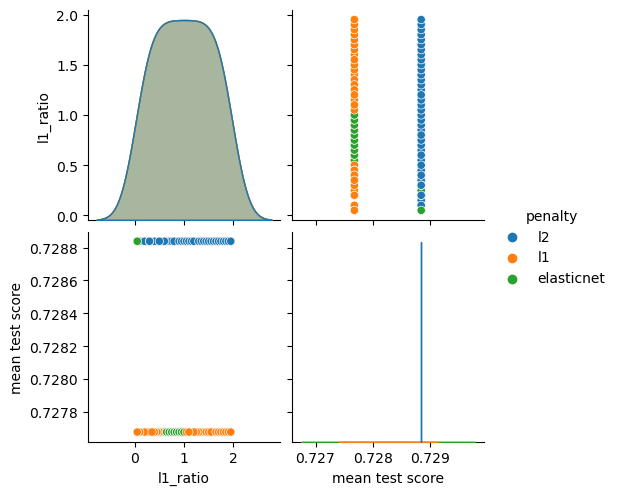

F1-Score en el conjunto de prueba: 0.7374810318664644


In [56]:
log = LogisticRegression(solver='saga')

param_log = {'penalty':['l1', 'l2', 'elasticnet'],#None
             'l1_ratio':np.arange(.05, 2, .05)}

df_log = grid_search(X_train, y_train,X_test, y_test, log, param_log, hue_feat='penalty')

In [61]:
gb = GradientBoostingClassifier()

param_gb = {'loss':['logloss','deviance','exponential'],
            'learning_rate': np.arange(.01, .4, .05),
            'n_estimators':np.arange(50,410, 50),
            'max_depth':np.arange(1,12,2),
            }

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not s

   learning_rate      loss  max_depth  n_estimators  mean test score
0          0.210  deviance          1           400            0.767
1          0.310  deviance          1           400            0.767
2          0.360  deviance          1           400            0.767
3          0.360  deviance          1           350            0.766
4          0.360  deviance          1           250            0.766
Index(['learning_rate', 'loss', 'max_depth', 'n_estimators',
       'mean test score'],
      dtype='object')


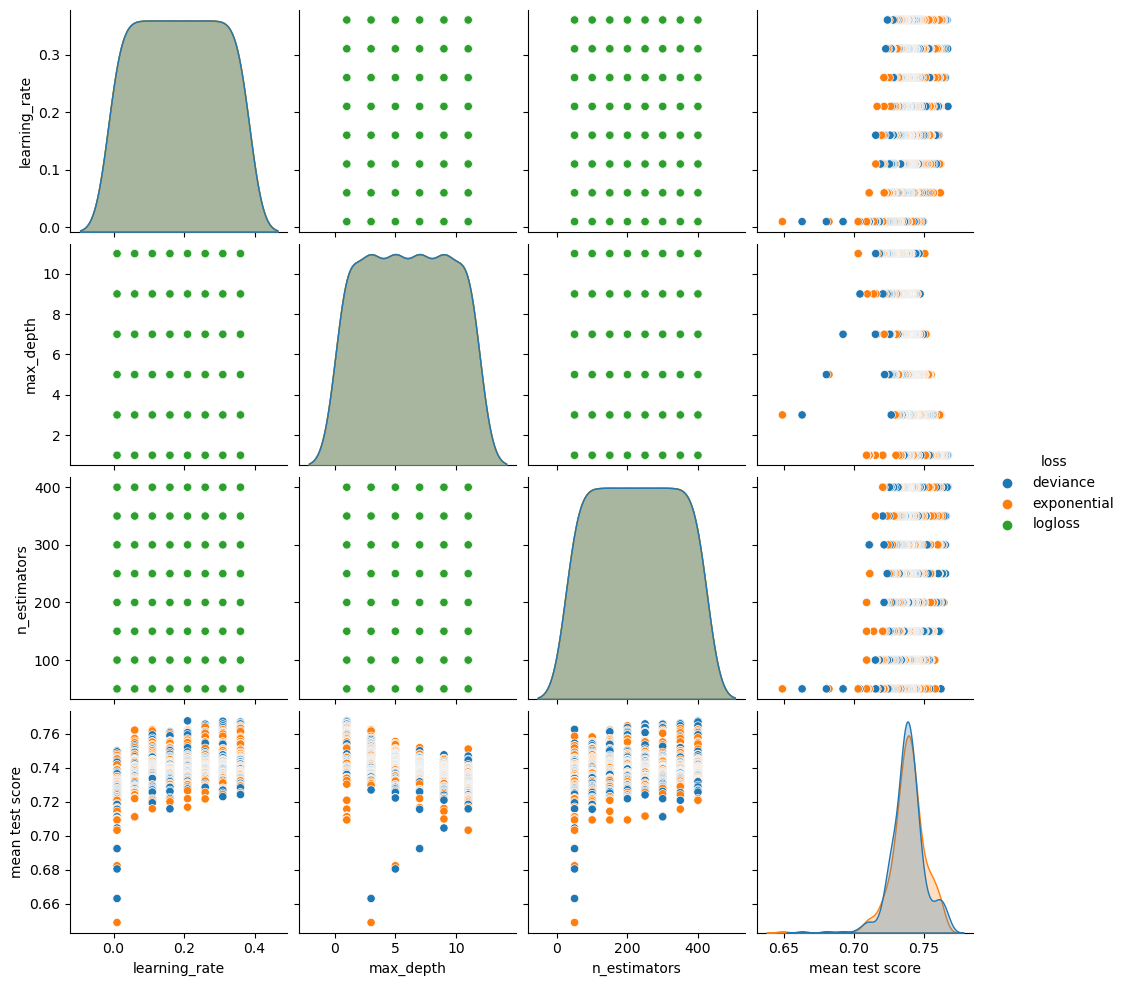

F1-Score en el conjunto de prueba: 0.7868852459016392


,learning_rate,loss,max_depth,n_estimators,mean test score
0,0.210,deviance,1,400,0.767
1,0.310,deviance,1,400,0.767
2,0.360,deviance,1,400,0.767
3,0.360,deviance,1,350,0.766
4,0.360,deviance,1,250,0.766
5,0.260,deviance,1,350,0.766
6,0.310,deviance,1,300,0.766
7,0.260,deviance,1,300,0.765
8,0.310,deviance,1,350,0.765
9,0.360,exponential,1,200,0.765


In [62]:
df_gb = grid_search(X_train, y_train,X_test, y_test, gb, param_gb, hue_feat='loss')
df_gb

loss: deviance, el más apropiado para problemas de clasificación binaria
learning_rate: 0.360
n_estimators: 250
max_depth: 1

In [63]:
rf = RandomForestClassifier()

param_rf = dict(n_estimators=np.arange(50,410,50),max_depth=np.arange(3,16,2),
                 min_samples_leaf=np.arange(2,12,1), criterion=['gini','log_loss',  'entropy']
                 )

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


2800 fits failed out of a total of 8400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\1636620\OneDrive\ANACONDA\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File

  criterion  max_depth  min_samples_leaf  n_estimators  mean test score
0      gini          5                 5           150            0.751
1   entropy          5                 5            50            0.750
2   entropy          5                 2           100            0.750
3      gini          5                 2           400            0.748
4   entropy          5                 8           200            0.748
Index(['criterion', 'max_depth', 'min_samples_leaf', 'n_estimators',
       'mean test score'],
      dtype='object')


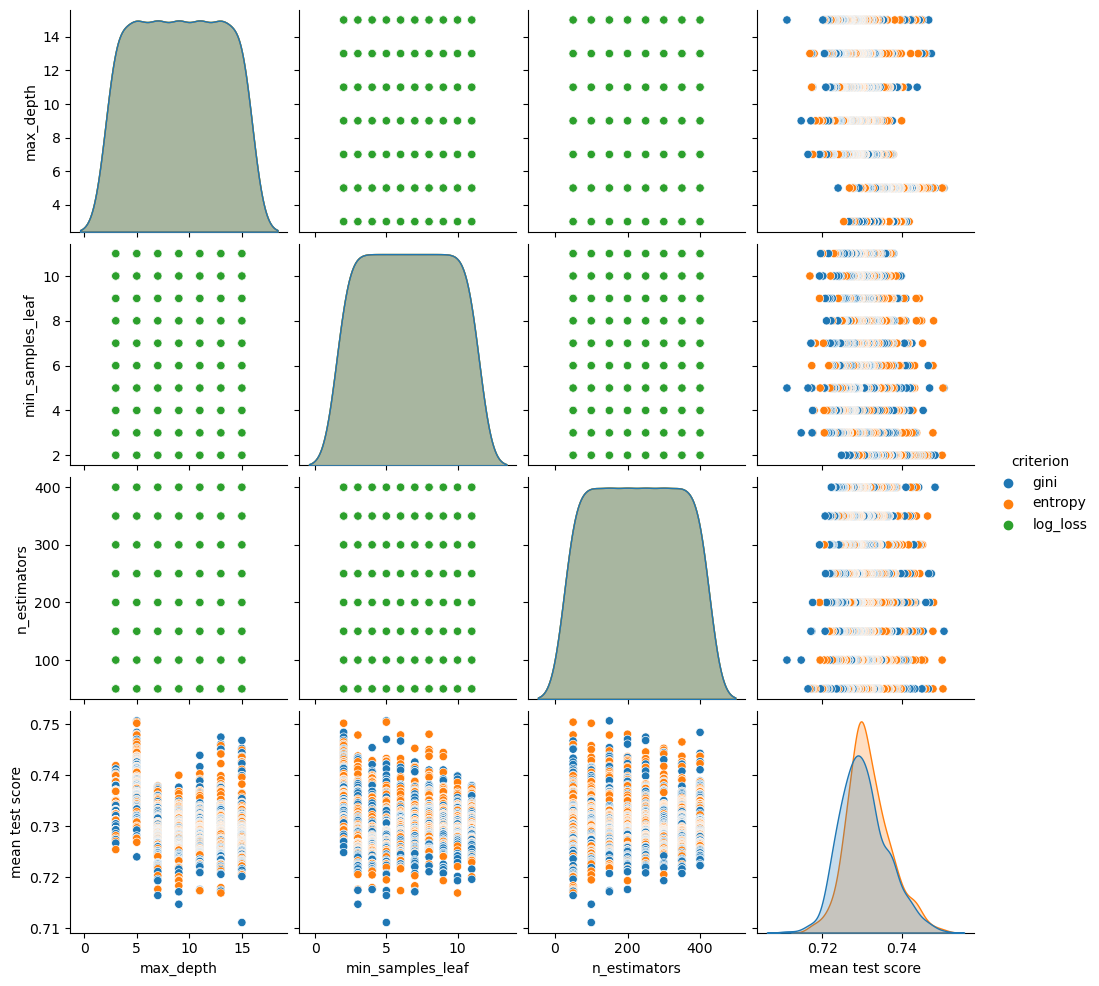

F1-Score en el conjunto de prueba: 0.765625


,criterion,max_depth,min_samples_leaf,n_estimators,mean test score
0,gini,5,5,150,0.751
1,entropy,5,5,50,0.750
2,entropy,5,2,100,0.750
3,gini,5,2,400,0.748
4,entropy,5,8,200,0.748
5,entropy,5,6,50,0.748
6,entropy,5,3,150,0.748
7,gini,13,2,250,0.748
8,gini,5,5,200,0.747
9,gini,15,2,250,0.747


In [64]:
df_rf = grid_search(X_train, y_train,X_test, y_test, rf, param_rf, hue_feat='criterion')
df_rf

Criterion: "entropy"
Max Depth: 5
Min Samples Leaf: 4 o 5
N Estimators: 150 o 200

Fitting 5 folds for each of 126 candidates, totalling 630 fits
      C gamma kernel  mean test score
0 1.000 0.200    rbf            0.752
1 1.000  auto    rbf            0.752
2 0.100 0.400    rbf            0.750
3 1.000 0.100    rbf            0.749
4 0.100 0.300    rbf            0.745
Index(['C', 'gamma', 'kernel', 'mean test score'], dtype='object')


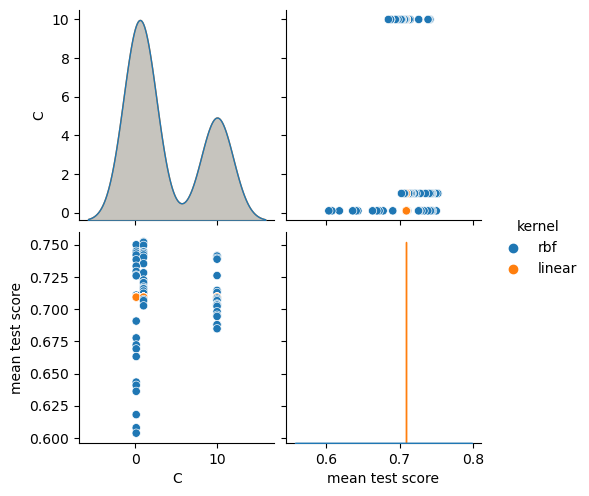

F1-Score en el conjunto de prueba: 0.7536704730831973


In [59]:
svm_model = SVC()

param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.arange(0.1, 2.0, 0.1))
}

df_svm_summary = grid_search(X_train, y_train, X_test, y_test, svm_model, param_svm, hue_feat='kernel')

Fitting 5 folds for each of 45 candidates, totalling 225 fits
   learning_rate  n_estimators  mean test score
0          1.000            50            0.760
1          1.000            80            0.758
2          1.000            70            0.757
3          1.000           100            0.757
4          1.000           160            0.757
Index(['learning_rate', 'n_estimators', 'mean test score'], dtype='object')


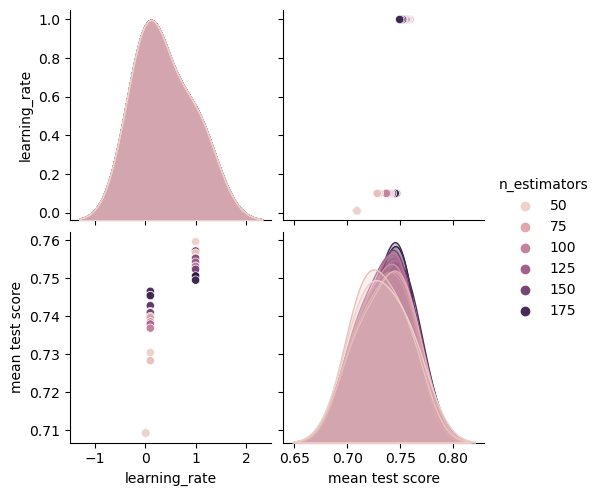

F1-Score en el conjunto de prueba: 0.7810650887573964


In [60]:
ada_boost = AdaBoostClassifier()

param_ada_boost = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.1, 1.0]
}

df_ada_boost_summary = grid_search(X_train, y_train,X_test, y_test, ada_boost, param_ada_boost, hue_feat='n_estimators')

learning_rate: 1.000 
n_estimators: 50             